## import all needed packages here.

In [569]:
# Install mlextend using below command
# pip install mlextend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from decimal import Decimal
import scipy.stats as sc
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Load data to pandas DataFrames.

In [558]:
df_academic = pd.read_json('./yelp_academic_dataset_user_no_friend.json', lines=True)
df_business = pd.read_json('./yelp_academic_dataset_business.json',  lines=True)
# df

## Q1. Correlation coefficient

### Q1a

#### Analysis.

In [559]:
corr_list = ["funny", "cool", "useful", "fans", "review_count"]
length = len(corr_list)

max_corr = 0
ans1 = ""
ans2 = ""

for i, val in enumerate(corr_list):
    for j in range(i+1, length):
        curr_corr = df_academic[val].corr(df_academic[corr_list[j]])
        if curr_corr > max_corr:
            ans1 = val
            ans2 = corr_list[j]
            max_corr = curr_corr
print("Iteratively compare all the values, storing the max value till the end.")

Iteratively compare all the values, storing the max value till the end.


#### Conclusions.

In [560]:
conclusions = 'Columns with strongest correlation are '+ '\033[1m' + ans1 + ' and ' + ans2 +  '\033[0m' + ' with ' + str(max_corr)
print('Conclusions:\n', conclusions)


Conclusions:
 Columns with strongest correlation are cool and useful with 0.9918405554730446


### Q1b

#### Analysis.

In [561]:
print("Taking current year as 2022, even though the data might be older, the differences would still be the same.")
df_academic['num_years_since_begin_yelp'] = df_academic['yelping_since'].apply(lambda x: 2022 - int(x[0:4]))

print("Convert stars to category codes to get well rounded int values, also same stars have same values as category code, so our data is not skewed or modified in a bad way.")
df_academic['stars_cat_codes'] = df_academic['average_stars'].astype('category').cat.codes
corr = df_academic["num_years_since_begin_yelp"].corr(df_academic["stars_cat_codes"])

df_academic

Taking current year as 2022, even though the data might be older, the differences would still be the same.
Convert stars to category codes to get well rounded int values, also same stars have same values as category code, so our data is not skewed or modified in a bad way.


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_years_since_begin_yelp,stars_cat_codes
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,56,18,232,844,467,467,239,180,15,291
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,157,251,1847,7054,3131,3131,1521,1946,13,274
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,17,3,66,96,119,119,35,18,14,232
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,6,2,12,16,26,26,10,9,17,327
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,0,0,1,1,0,0,0,0,15,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,0,4.92,...,0,0,0,0,0,0,0,0,7,392
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,0,5.00,...,0,0,0,0,0,0,0,0,6,400
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,0,2.00,...,0,0,0,0,0,0,0,0,5,100
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,0,3.00,...,0,0,0,0,0,0,0,0,11,200


#### Conclusions.

In [562]:
conclusions = "The correlation stands at positive 0.1, this means a very weak correlation between the average stars and when the yelper created the account. Anything between the range of -0.1 to 0.1 signifies weak correlation."
print("Correlation value: " + str(corr))
print('Conclusions:\n', conclusions)

Correlation value: 0.11355298812690492
Conclusions:
 The correlation stands at positive 0.1, this means a very weak correlation between the average stars and when the yelper created the account. Anything between the range of -0.1 to 0.1 signifies weak correlation.


### Q1c

#### Analysis.

In [563]:
def count(x):
    years = x.split(',')
    if years[0] == '':
        return 0
    return len(years)
    
df_academic['elite_year_count'] = df_academic['elite']
df_academic['elite_year_count'] = df_academic['elite_year_count'].apply(count)

print("Pearsons coefficient: " + str(sc.pearsonr(df_academic['elite_year_count'], df_academic['review_count'])))
print("Spearmanr coefficient: " + str(sc.spearmanr(df_academic['elite_year_count'], df_academic['review_count'])))


Pearsons coefficient: (0.6866321793821166, 0.0)
Spearmanr coefficient: SpearmanrResult(correlation=0.3512220225618609, pvalue=0.0)


#### Plot.

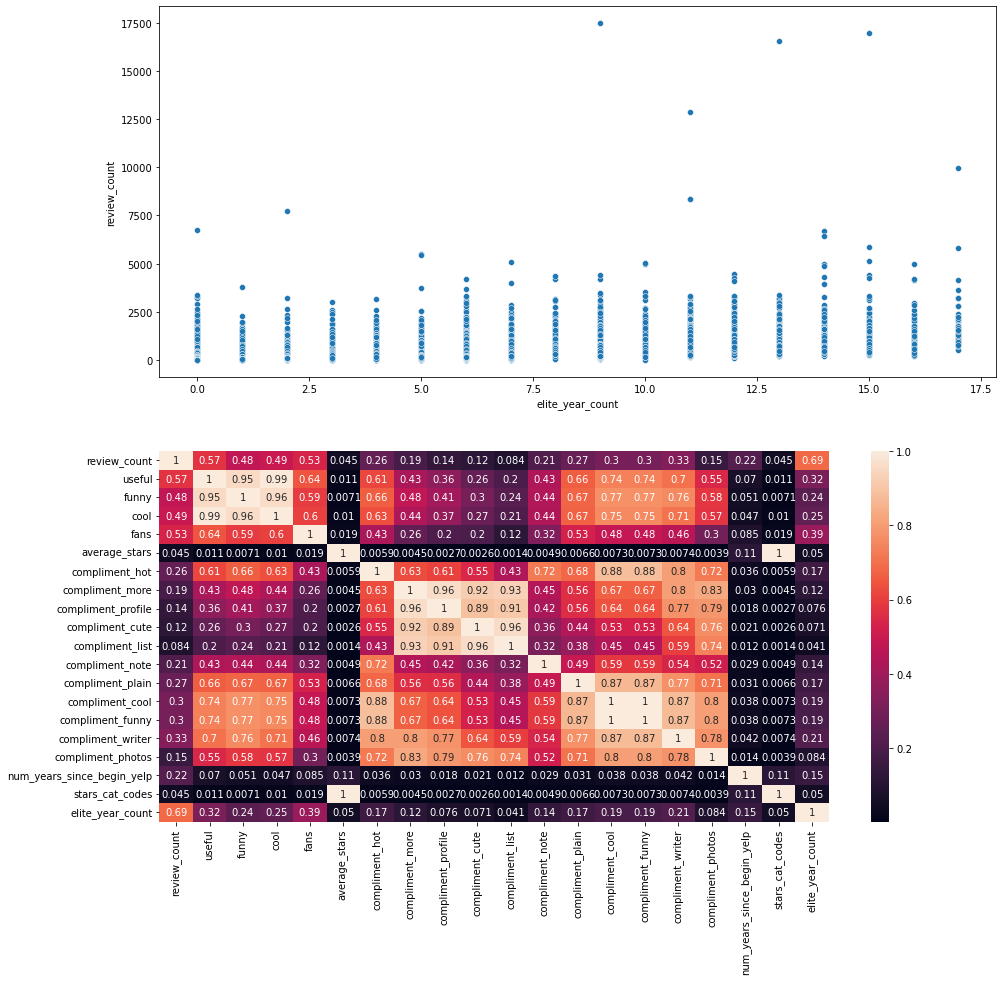

In [564]:
# plt.scatter(df['review_count'], df['year_count'])
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

sns.scatterplot(x="elite_year_count", y="review_count", data=df_academic, ax=axs[0])
# sns.lmplot(x="review_count", y="elite_year_count", data=df_academic)

cormat = df_academic.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True, ax=axs[1])

plt.show()

#### Conclusions.

In [565]:
conclusions = "Pearson Coefficient value of 0.69 shows a postive correlation between the two values years a yelper has been elite and review count.\n Spearmanr coefficient of 0.35 tells us a positive but a weak monotonic relationship betweem the data."

print('Conclusions:\n', conclusions)

Conclusions:
 Pearson Coefficient value of 0.69 shows a postive correlation between the two values years a yelper has been elite and review count.
 Spearmanr coefficient of 0.35 tells us a positive but a weak monotonic relationship betweem the data.


## Q2. Chi Square Test

#### Analysis.

In [570]:
hypothesis = "\n\nNull Hypothesis (H0): Business open or closed is independent of the star rating and vice versa\n\nAlternative Hypothesis (H1): Business open or closed depends on the star rating and vice versa."
print('Hypothesis:\t', hypothesis)

def starVal(x):
    return x >= 2.5

df_business['stars_greater_2.5'] = df_business['stars'].apply(starVal)

df_contingency = pd.crosstab(df_business['is_open'], df_business['stars_greater_2.5'])
print(df_contingency)
print("\n")

print("Performing Chi Square Test")
stat, p_value, dof, expected = sc.chi2_contingency(df_contingency)

stat, p_value, dof, expected

Hypothesis:	 

Null Hypothesis (H0): Business open or closed is independent of the star rating and vice versa

Alternative Hypothesis (H1): Business open or closed depends on the star rating and vice versa.
stars_greater_2.5  False    True
is_open                         
0                   2841   27799
1                  13540  106063


Performing Chi Square Test


(105.16450313571691,
 1.1240560284422546e-24,
 1,
 array([[  3340.68036448,  27299.31963552],
        [ 13040.31963552, 106562.68036448]]))

#### Conclusions.

In [571]:
significance = 0.05

print("p value: " + str(Decimal(p_value)))

print()
if p_value <= significance:
    conclusions = 'Dependent (reject H0): Business open or closed affects the star rating and vice versa. The p_value obtained from chi square test is below the significance level of 0.05, hence proving our hypothesis 1.'
else:
    conclusions = 'Independent (fail to reject H0): Business open or closed is independent of the star rating and vice versa'

print('Conclusions:\n', conclusions)


p value: 1.12405602844225461074773041166811347642385857339797507361573643031200930852975261586834676563739776611328125E-24

Conclusions:
 Dependent (reject H0): Business open or closed affects the star rating and vice versa. The p_value obtained from chi square test is below the significance level of 0.05, hence proving our hypothesis 1.


## Q3. Association rule

### Q3a

#### Analysis.

In [572]:
data = list(df_business["categories"].apply(lambda x: x.split(",")))
for lst in data:
    for i, val in enumerate(lst):
        lst[i] = val.strip()
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df_association = pd.DataFrame(a_data,columns=a.columns_)

df_association = apriori(df_association, min_support = 0.05, use_colnames = True, verbose = 1)
# Association rule with min confidence of 90%
df_ar = association_rules(df_association, metric = "confidence", min_threshold = 0.9)
df_ar

Processing 18 combinations | Sampling itemset size 32


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(American (Traditional)),(Restaurants),0.054172,0.347890,0.054172,1.000000,2.874474,0.035326,inf
1,(Bars),(Nightlife),0.073647,0.081741,0.073647,1.000000,12.233776,0.067627,inf
2,(Nightlife),(Bars),0.081741,0.073647,0.073647,0.900985,12.233776,0.067627,9.355705
3,(Sandwiches),(Restaurants),0.055683,0.347890,0.055683,1.000000,2.874474,0.036312,inf
4,"(Bars, Restaurants)",(Nightlife),0.055490,0.081741,0.055490,1.000000,12.233776,0.050954,inf
5,"(Restaurants, Nightlife)",(Bars),0.058059,0.073647,0.055490,0.955749,12.977372,0.051214,20.934130


#### Conclusions.

In [573]:
conclusions = "(Restaurants, Nightlife) --> (Bars) with maximum lift of 12.977372, support 0.055490 and confidence 0.955749"
print('Conclusions:\n', conclusions)

Conclusions:
 (Restaurants, Nightlife) --> (Bars) with maximum lift of 12.977372, support 0.055490 and confidence 0.955749


### Q3b

#### Analysis.

In [574]:
data = list(df_business["categories"].apply(lambda x: x.split(",")))
for lst in data:
    for i, val in enumerate(lst):
        lst[i] = val.strip()
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df_association = pd.DataFrame(a_data,columns=a.columns_)
df_association = apriori(df_association, min_support = 0.01, use_colnames = True, verbose = 1)
# Association rule with min confidence of 90%
df_ar = association_rules(df_association, metric = "confidence", min_threshold = 0.9)
df_ar

Processing 15 combinations | Sampling itemset size 5 43


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Accessories),(Fashion),0.010909,0.038198,0.010909,1.000000,26.179300,0.010492,inf
1,(Accessories),(Shopping),0.010909,0.162370,0.010909,1.000000,6.158762,0.009138,inf
2,(Fitness & Instruction),(Active Life),0.021918,0.051164,0.021918,1.000000,19.545076,0.020796,inf
3,(Gyms),(Active Life),0.012187,0.051164,0.012187,1.000000,19.545076,0.011563,inf
4,(American (New)),(Restaurants),0.040581,0.347890,0.040581,1.000000,2.874474,0.026463,inf
...,...,...,...,...,...,...,...,...,...
189,"(Bars, Food, Restaurants)",(Nightlife),0.011947,0.081741,0.011947,1.000000,12.233776,0.010971,inf
190,"(Food, Restaurants, Nightlife)",(Bars),0.012713,0.073647,0.011947,0.939791,12.760683,0.011011,15.385509
191,"(Bars, Sports Bars, Restaurants)",(Nightlife),0.011961,0.081741,0.011961,1.000000,12.233776,0.010983,inf
192,"(Sports Bars, Restaurants, Nightlife)",(Bars),0.011961,0.073647,0.011961,1.000000,13.578220,0.011080,inf


#### Conclusions.

In [575]:
print('Conclusions:\n', conclusions)
df_ar['antecedents']

idx_list = []

for idx, val in enumerate(df_ar['antecedents']):
    words = tuple(val)
    for word in words:
        if word == "Auto Repair":
            idx_list.append(idx)
            
for idx, val in enumerate(df_ar['consequents']):
    words = tuple(val)
    for word in words:
        if word == "Auto Repair":
            idx_list.append(idx)
            
print("All indices with Auto repair as part of the rule\n")
print(idx_list)


print("Indices with maximum lift are 11, 114 and 115 with lift of 24.89\n")
print("Rules are:\n (Oil Change Stations) -> (Auto Repair)\n (Automotive, Oil Change Stations) -> (Auto Repair)\n (Oil Change Stations) -> (Auto Repair, Automotive)\n")
print("The Support, Lift, and Leverage are symmetric with respect to interchange of the two products 𝐴↔𝐶, so we would expect those metrics to be the same for the rule and its mirror rule. Confidence changes with interchange of products 𝐴↔𝐶 != 𝐶↔𝐴, so confidence is assymetric, lift is symmetric.")
        

Conclusions:
 (Restaurants, Nightlife) --> (Bars) with maximum lift of 12.977372, support 0.055490 and confidence 0.955749
All indices with Auto repair as part of the rule

[10, 113, 116, 11, 114, 115]
Indices with maximum lift are 11, 114 and 115 with lift of 24.89

Rules are:
 (Oil Change Stations) -> (Auto Repair)
 (Automotive, Oil Change Stations) -> (Auto Repair)
 (Oil Change Stations) -> (Auto Repair, Automotive)

The Support, Lift, and Leverage are symmetric with respect to interchange of the two products 𝐴↔𝐶, so we would expect those metrics to be the same for the rule and its mirror rule. Confidence changes with interchange of products 𝐴↔𝐶 != 𝐶↔𝐴, so confidence is assymetric, lift is symmetric.


## Q4. ANOVA 

### Q4a

#### Plot.

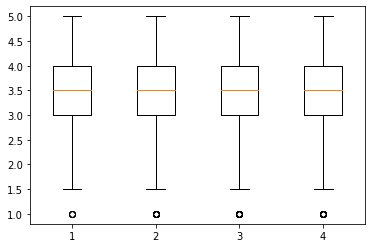

In [576]:
df_business

american_mask = df_business['categories'].str.contains('Restaurants', case=False, na=False) & df_business['categories'].str.contains('American', case=False, na=False) & ~df_business['categories'].str.contains('Chinese', case=False, na=False)& ~df_business['categories'].str.contains('Italian', case=False, na=False)& ~df_business['categories'].str.contains('Mexican', case=False, na=False)
chinese_mask = df_business['categories'].str.contains('Restaurants', case=False, na=False) & ~df_business['categories'].str.contains('American', case=False, na=False) & df_business['categories'].str.contains('Chinese', case=False, na=False)& ~df_business['categories'].str.contains('Italian', case=False, na=False)& ~df_business['categories'].str.contains('Mexican', case=False, na=False)
mexican_mask = df_business['categories'].str.contains('Restaurants', case=False, na=False) & ~df_business['categories'].str.contains('American', case=False, na=False) & ~df_business['categories'].str.contains('Chinese', case=False, na=False)& ~df_business['categories'].str.contains('Italian', case=False, na=False)& df_business['categories'].str.contains('Mexican', case=False, na=False)
italian_mask = df_business['categories'].str.contains('Restaurants', case=False, na=False) & ~df_business['categories'].str.contains('American', case=False, na=False) & ~df_business['categories'].str.contains('Chinese', case=False, na=False)& df_business['categories'].str.contains('Italian', case=False, na=False)& ~df_business['categories'].str.contains('Mexican', case=False, na=False)

fig, ax = plt.subplots()
columns = [df_business[chinese_mask]['stars'], df_business[american_mask]['stars'], df_business[mexican_mask]['stars'], df_business[italian_mask]['stars']]

plt.boxplot(columns)
plt.show()

#### Conclusions.

In [577]:
print("American Mean : " + str(df_business[american_mask]['stars'][0:1000].mean()))
print("Chinese Mean : " + str(df_business[chinese_mask]['stars'][0:1000].mean()))
print("Mexican Mean : " + str(df_business[mexican_mask]['stars'][0:1000].mean()))
print("Italian Mean : " + str(df_business[italian_mask]['stars'][0:1000].mean()))
print()

conclusions = "The mean values of the 4 box plots are near about the same and dont provide much further information about the cuisines, the lower and upper end of the values are also not very informative. Since the visualisation is not very descriptive, we need to perform more comprehensive analysis on the data."
print('Conclusions:\n', conclusions)

American Mean : 3.5045
Chinese Mean : 3.3895
Mexican Mean : 3.4735
Italian Mean : 3.496

Conclusions:
 The mean values of the 4 box plots are near about the same and dont provide much further information about the cuisines, the lower and upper end of the values are also not very informative. Since the visualisation is not very descriptive, we need to perform more comprehensive analysis on the data.


### Q4b

#### Formulate hypothesis.

In [578]:
hypothesis = "\n\nNull Hypothesis (H0): There is no difference in the average star rating of cusines : American, Chinese, Mexican and Italian ; they are all the same\n\nAlternative Hypothesis (H1): The average star rating is not the same between the four cuisines."
print('Conclusions:\t', hypothesis)


Conclusions:	 

Null Hypothesis (H0): There is no difference in the average star rating of cusines : American, Chinese, Mexican and Italian ; they are all the same

Alternative Hypothesis (H1): The average star rating is not the same between the four cuisines.


#### Check for ANOVA assumptions.

Three assumptions for anova listed below: 

1) Samples follow normal distribution.

2) Samples have near equal variance.

3) Samples are independent

The graphs in order are american, chinese, mexican and italian respectively.





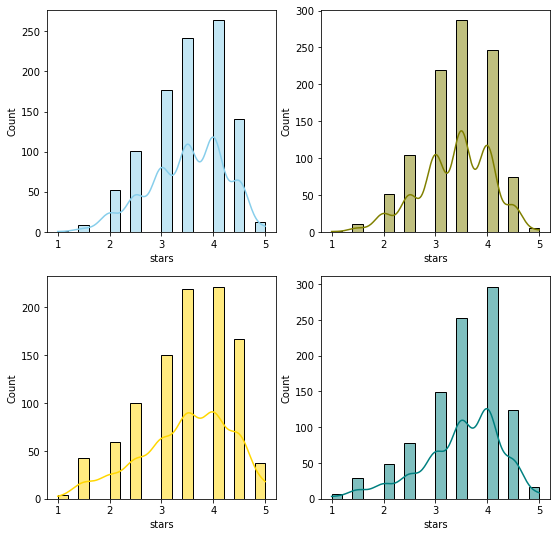


The distributions are normal enough to proceed to the second assumption.

Standard deviation for american cuisine: 0.7357112348068524
Standard deviation for chinese cuisine: 0.6797071073276768
Standard deviation for mexican cuisine: 0.8791021388727089
Standard deviation for italian cuisine: 0.7858763271670672

The second assumption also stands, variances or standard deviations are quite similar, we move on to the third assumption.

We used extensive filtering on our data, let's say one restaurant has both chinese and american, to remove dependence, they are excluded from both. We only consider pure restaurants which serve exclusively cuisine in one of the groups. So our data is pretty independent.


In [579]:
assumptions = "Three assumptions for anova listed below: \n\n1) Samples follow normal distribution.\n\n2) Samples have near equal variance.\n\n3) Samples are independent"
print(assumptions + "\n")

# Cuisine masks
# Sub sampling 1000 values

american_cuisine = df_business[american_mask][0:1000] 
chinese_cuisine = df_business[chinese_mask][0:1000]
mexican_cuisine = df_business[mexican_mask][0:1000]
italian_cuisine = df_business[italian_mask][0:1000]

# plt.hist(american_cuisine['stars'])
# plt.hist(chinese_cuisine['stars'])
# plt.hist(mexican_cuisine['stars'])
# plt.hist(italian_cuisine['stars'])

print("The graphs in order are american, chinese, mexican and italian respectively.")
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=american_cuisine['stars'], kde=True, color="skyblue", ax=axs[0, 0])
print()
sns.histplot(data=chinese_cuisine['stars'], kde=True, color="olive", ax=axs[0, 1])
print()
sns.histplot(data=mexican_cuisine['stars'], kde=True, color="gold", ax=axs[1, 0])
print()
sns.histplot(data=italian_cuisine['stars'], kde=True, color="teal", ax=axs[1, 1])

plt.show()

print("\nThe distributions are normal enough to proceed to the second assumption.")
print()
print("Standard deviation for american cuisine: " + str(american_cuisine['stars'].std()))
print("Standard deviation for chinese cuisine: " + str(chinese_cuisine['stars'].std()))
print("Standard deviation for mexican cuisine: " + str(mexican_cuisine['stars'].std()))
print("Standard deviation for italian cuisine: " + str(italian_cuisine['stars'].std()) + "\n")

print("The second assumption also stands, variances or standard deviations are quite similar, we move on to the third assumption.\n")

print("We used extensive filtering on our data, let's say one restaurant has both chinese and american, to remove dependence, they are excluded from both. We only consider pure restaurants which serve exclusively cuisine in one of the groups. So our data is pretty independent.")



In [580]:
findings = "With our assumptions clear, we move onto Anova analysis. Findings detailed below."
print('findings: ', findings)

findings:  With our assumptions clear, we move onto Anova analysis. Findings detailed below.


#### ANOVA.

In [581]:
print('Performing Anova on the stars column for the 4 cuisines.\n')

print(sc.f_oneway(american_cuisine['stars'], chinese_cuisine['stars'], mexican_cuisine['stars'], italian_cuisine['stars']))


Performing Anova on the stars column for the 4 cuisines.

F_onewayResult(statistic=4.618069659772059, pvalue=0.0031430141591842447)


#### Conclusions.

In [582]:
conclusions = "\nThe p-value (0.00314301) is less than the confidence level of .05. Therefore, the null hypothesis should be rejected; there is atleast one cuisine that has a different mean star rating."
print('Conclusions:\t', conclusions)

Conclusions:	 
The p-value (0.00314301) is less than the confidence level of .05. Therefore, the null hypothesis should be rejected; there is atleast one cuisine that has a different mean star rating.


### Q4c

#### Box Plot

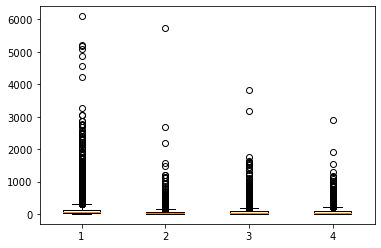

The graphs in order are american, chinese, mexican and italian respectively.
American Mean : 132.799
Chinese Mean : 60.904
Mexican Mean : 87.584
Italian Mean : 86.315

Conclusions:
 The mean values of the 4 plots are nowhere near, they have mean difference among all the reviews except mexican and italian.


In [583]:
fig, ax = plt.subplots()
columns = [df_business[american_mask]['review_count'], df_business[chinese_mask]['review_count'], df_business[mexican_mask]['review_count'], df_business[italian_mask]['review_count']]

plt.boxplot(columns)
plt.show()

print("The graphs in order are american, chinese, mexican and italian respectively.")
print("American Mean : " + str(df_business[american_mask]['review_count'][0:1000].mean()))
print("Chinese Mean : " + str(df_business[chinese_mask]['review_count'][0:1000].mean()))
print("Mexican Mean : " + str(df_business[mexican_mask]['review_count'][0:1000].mean()))
print("Italian Mean : " + str(df_business[italian_mask]['review_count'][0:1000].mean()))
print()

conclusions = "The mean values of the 4 plots are nowhere near, they have mean difference among all the reviews except mexican and italian."
print('Conclusions:\n', conclusions)

#### Formulate hypothesis.

In [584]:
hypothesis = "\n\nNull Hypothesis (H0): There is no difference in the average review count of cusines : American, Chinese, Mexican and Italian ; they are all the same\n\nAlternative Hypothesis (H1): The average review count is not the same between the four cuisines."
print('Hypothesis:\t', hypothesis)


Hypothesis:	 

Null Hypothesis (H0): There is no difference in the average review count of cusines : American, Chinese, Mexican and Italian ; they are all the same

Alternative Hypothesis (H1): The average review count is not the same between the four cuisines.


#### Check for ANOVA assumptions.

Three assumptions for anova listed below: 

1) Samples follow normal distribution.

2) Samples have near equal variance.

3) Samples are independent






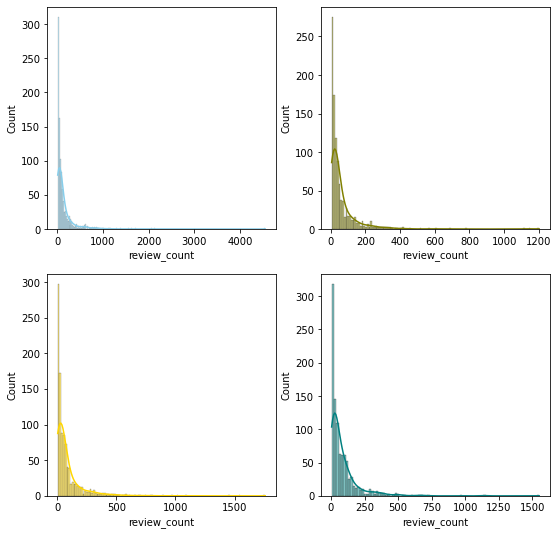


The distributions are not normal with the graph skewing to one side of the graph for all the value and uneven distribution around the mean.

Standard deviation for american cuisine: 259.48217202073164
Standard deviation for chinese cuisine: 99.58084720029812
Standard deviation for mexican cuisine: 149.43976441090638
Standard deviation for italian cuisine: 125.29932040795227



In [585]:
assumptions = "Three assumptions for anova listed below: \n\n1) Samples follow normal distribution.\n\n2) Samples have near equal variance.\n\n3) Samples are independent"
print(assumptions + "\n")

# Cuisine masks
# Sub sampling 1000 values

american_cuisine = df_business[american_mask][0:1000] 
chinese_cuisine = df_business[chinese_mask][0:1000]
mexican_cuisine = df_business[mexican_mask][0:1000]
italian_cuisine = df_business[italian_mask][0:1000]

# plt.hist(american_cuisine['stars'])
# plt.hist(chinese_cuisine['stars'])
# plt.hist(mexican_cuisine['stars'])
# plt.hist(italian_cuisine['stars'])

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=american_cuisine['review_count'], kde=True, color="skyblue", ax=axs[0, 0])
print()
sns.histplot(data=chinese_cuisine['review_count'], kde=True, color="olive", ax=axs[0, 1])
print()
sns.histplot(data=mexican_cuisine['review_count'], kde=True, color="gold", ax=axs[1, 0])
print()
sns.histplot(data=italian_cuisine['review_count'], kde=True, color="teal", ax=axs[1, 1])

plt.show()

print("\nThe distributions are not normal with the graph skewing to one side of the graph for all the value and uneven distribution around the mean.")
print()
print("Standard deviation for american cuisine: " + str(american_cuisine['review_count'].std()))
print("Standard deviation for chinese cuisine: " + str(chinese_cuisine['review_count'].std()))
print("Standard deviation for mexican cuisine: " + str(mexican_cuisine['review_count'].std()))
print("Standard deviation for italian cuisine: " + str(italian_cuisine['review_count'].std()) + "\n")


In [586]:
findings = ""
print('Findings:\n', findings)
print("The second assumption also fails, the deviation among the cuisines are massive and this violates our second assumption.\n")
print("We used extensive filtering on our data, let's say one restaurant has both chinese and american, to remove dependence, they are excluded from both. We only consider pure restaurants which serve exclusively cuisine in one of the groups. So our data is pretty independent.\n")
print("Our 1st and 2nd assumptions dont hold but our 3rd assumption stands, we proceed to the anova testing.")

Findings:
 
The second assumption also fails, the deviation among the cuisines are massive and this violates our second assumption.

We used extensive filtering on our data, let's say one restaurant has both chinese and american, to remove dependence, they are excluded from both. We only consider pure restaurants which serve exclusively cuisine in one of the groups. So our data is pretty independent.

Our 1st and 2nd assumptions dont hold but our 3rd assumption stands, we proceed to the anova testing.


#### ANOVA.

In [587]:
print('Performing Anova on the stars column for the 4 cuisines.\n')

print(sc.f_oneway(american_cuisine['review_count'], chinese_cuisine['review_count'], mexican_cuisine['review_count'], italian_cuisine['review_count']))


Performing Anova on the stars column for the 4 cuisines.

F_onewayResult(statistic=31.03529730177147, pvalue=7.949658211048228e-20)


#### Conclusions.

In [588]:
conclusions = "\nThe p-value (0.000000000000000000079) is comparitively very less than the confidence level of .05. Therefore, the null hypothesis should be rejected; there is atleast one cuisine that has a different mean review count. With box plot the visuals arent that clear but it's apparent from the numbers as well as Anove that there is a huge deviation in the mean. Specifically for Anova, our data is not normally distributed, variance is high. Two assumptions on very shaky and third assumption although true couldnt offset the massive difference among the two assumptions. Anova shouldnt applied to the review count for primarily the reasons mentioned."
print('Conclusions:\t', conclusions)

Conclusions:	 
The p-value (0.000000000000000000079) is comparitively very less than the confidence level of .05. Therefore, the null hypothesis should be rejected; there is atleast one cuisine that has a different mean review count. With box plot the visuals arent that clear but it's apparent from the numbers as well as Anove that there is a huge deviation in the mean. Specifically for Anova, our data is not normally distributed, variance is high. Two assumptions on very shaky and third assumption although true couldnt offset the massive difference among the two assumptions. Anova shouldnt applied to the review count for primarily the reasons mentioned.
